# 1. Import SQL, NumPy, pandas, Matplotlib for Python

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

* Connect to the database file `movies.db` and use the file path `data/`.

In [2]:
conn = sqlite3.connect('data\movies.db')

# 2. Open the database file as a dataframe called `query`.

In addition, you will `JOIN` tables and `SELECT` all the rows below to get the information you need.

Since this is a `db` file, you will need to use `pd.read_sql` and input the SQL code to get the output below.

In [3]:
#Print the query dataframe and filter the rows needed
query = pd.read_sql('''SELECT DISTINCT tconst, g.title, i.genres, g.studio,  g.year,
                       t.production_budget, t.worldwide_gross
                       FROM bom_movie_gross as g
                       JOIN imdb_title_basics as i
                       ON g.title = i.primary_title
                       AND g.year = i.start_year
                       JOIN tn_movie_budgets as t
                       ON t.movie = i.primary_title''', conn)
query.head()

,tconst,title,genres,studio,year,production_budget,worldwide_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,"$200,000,000","$1,068,879,522"
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,"$160,000,000","$835,524,642"
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,"$165,000,000","$756,244,673"
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,"$68,000,000","$706,102,828"
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,"$170,000,000","$621,156,389"


I've joined the `bom_movie_gross` table and the `imdb_title_basics` table to get the data I need for Microsoft. All columns selected are `DISTINCT` so we receive different values for each movie. In addition, we used the `ON` clause to `JOIN` multiple columns. First, we connected the tables based on movie title - `g.title = i.primary_title`. Then we connected the tables based on year - `g.year = i.start_year` - because we only need movies under the `title` column listed once. Otherwise, we would have "Frozen" listed three times.

I've also joined the `tn_movie_budgets` table with the `imdb_basiccs_title` table based on movie title - `t.movie = i.primary_title`. This will allow us to add `production_budget` and `worldwide_gross` columns in the next steps.

# 3. Convert `production_budget` and `worldwide_gross` columns to floats in the dataframe.

First, we need to remove the commas ( , ) and the $ from the dataframe.

In [4]:
#Eliminate all $ and commas from the columns
query['production_budget'] = query['production_budget'].map(lambda x: x.replace(',', ''))
query['production_budget'] = query['production_budget'].map(lambda x: x.replace('$', ''))
query['worldwide_gross'] = query['worldwide_gross'].map(lambda x: x.replace(',', ''))
query['worldwide_gross'] = query['worldwide_gross'].map(lambda x: x.replace('$', ''))

In [5]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,200000000,1068879522
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,160000000,835524642
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,165000000,756244673
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,68000000,706102828
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,170000000,621156389
...,...,...,...,...,...,...,...
1070,tt1034415,Suspiria,"Fantasy,Horror,Mystery",Amazon,2018,20000000,7034615
1071,tt5360952,The Hurricane Heist,"Action,Adventure,Crime",ENTMP,2018,40000000,30963684
1072,tt7137380,Destroyer,"Action,Crime,Drama",Annapurna,2018,9000000,3681096
1073,tt1801552,Gotti,"Biography,Crime,Drama",VE,2018,10000000,6089100


Next, the `production_budget` column and the `worldwide_gross` column will have to be converted from a string to a float. Check the dtypes for all columns and you'll see both columns are currently strings - `object`.

In [6]:
query.dtypes

tconst               object
title                object
genres               object
studio               object
year                  int64
production_budget    object
worldwide_gross      object
dtype: object

In [7]:
#Convert columns from strings to floats
query.production_budget = query.production_budget.astype(float)
query.worldwide_gross = query.worldwide_gross.astype(float)
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,200000000.0,1.068880e+09
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,160000000.0,8.355246e+08
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,165000000.0,7.562447e+08
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,68000000.0,7.061028e+08
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,170000000.0,6.211564e+08
...,...,...,...,...,...,...,...
1070,tt1034415,Suspiria,"Fantasy,Horror,Mystery",Amazon,2018,20000000.0,7.034615e+06
1071,tt5360952,The Hurricane Heist,"Action,Adventure,Crime",ENTMP,2018,40000000.0,3.096368e+07
1072,tt7137380,Destroyer,"Action,Crime,Drama",Annapurna,2018,9000000.0,3.681096e+06
1073,tt1801552,Gotti,"Biography,Crime,Drama",VE,2018,10000000.0,6.089100e+06


Run the dtypes again and you'll see both columns are now floats - `float64`.

In [8]:
#Verify change
query.dtypes

tconst                object
title                 object
genres                object
studio                object
year                   int64
production_budget    float64
worldwide_gross      float64
dtype: object

# 4. Add a new column called `profit` to the dataframe.

**We'll use the newly created `profit` column as our primary metric for our data!**

In [9]:
#Add 'profit' column to the dataframe
query['profit'] = query['worldwide_gross'] - query['production_budget']
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
0,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",BV,2010,200000000.0,1.068880e+09,868879522.0
1,tt1375666,Inception,"Action,Adventure,Sci-Fi",WB,2010,160000000.0,8.355246e+08,675524642.0
2,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",P/DW,2010,165000000.0,7.562447e+08,591244673.0
3,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",Sum.,2010,68000000.0,7.061028e+08,638102828.0
4,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",Par.,2010,170000000.0,6.211564e+08,451156389.0
...,...,...,...,...,...,...,...,...
1070,tt1034415,Suspiria,"Fantasy,Horror,Mystery",Amazon,2018,20000000.0,7.034615e+06,-12965385.0
1071,tt5360952,The Hurricane Heist,"Action,Adventure,Crime",ENTMP,2018,40000000.0,3.096368e+07,-9036316.0
1072,tt7137380,Destroyer,"Action,Crime,Drama",Annapurna,2018,9000000.0,3.681096e+06,-5318904.0
1073,tt1801552,Gotti,"Biography,Crime,Drama",VE,2018,10000000.0,6.089100e+06,-3910900.0


# 5. Find the Top 10 Most Profitable Films using the `profit` column.

Sort the dataframe in descending order and then reduce the list down to the top 10 profitable films.

In [10]:
#Top 10 Profitable Films
query = query.sort_values('profit', ascending=False).iloc[:10]

In [11]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09


# 6. Sort the `query` database to display only the movie titles and their profits.

I want to use this information for a bar plot I'll create in the next step.

Sort the values to display only movie titles and their profits.

In [12]:
movie_profits = query.set_index('title')['profit'].sort_values(ascending=False)

In [13]:
movie_profits

title
Avengers: Infinity War            1.748134e+09
Jurassic World                    1.433855e+09
Furious 7                         1.328723e+09
Black Panther                     1.148258e+09
Jurassic World: Fallen Kingdom    1.135773e+09
Frozen                            1.122470e+09
Minions                           1.086336e+09
Avengers: Age of Ultron           1.072414e+09
Incredibles 2                     1.042521e+09
Iron Man 3                        1.015392e+09
Name: profit, dtype: float64

# 7. Generate a bar plot

In the cell below, create a sorted bar chart displaying the Top 10 Films with the highest `profit`.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Top 10 Worldwide Profitable Movies`
3. A ylabel set to `Total Profit (in billions $)`
4. An xlabel set to `Movies`

In [14]:
movie_profits.index

Index(['Avengers: Infinity War', 'Jurassic World', 'Furious 7',
       'Black Panther', 'Jurassic World: Fallen Kingdom', 'Frozen', 'Minions',
       'Avengers: Age of Ultron', 'Incredibles 2', 'Iron Man 3'],
      dtype='object', name='title')

In [15]:
movie_profits.values

array([1.74813420e+09, 1.43385486e+09, 1.32872279e+09, 1.14825822e+09,
       1.13577280e+09, 1.12246991e+09, 1.08633617e+09, 1.07241396e+09,
       1.04252071e+09, 1.01539227e+09])

<ipython-input-16-30e8a7f3da02>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(' ', '\n'))


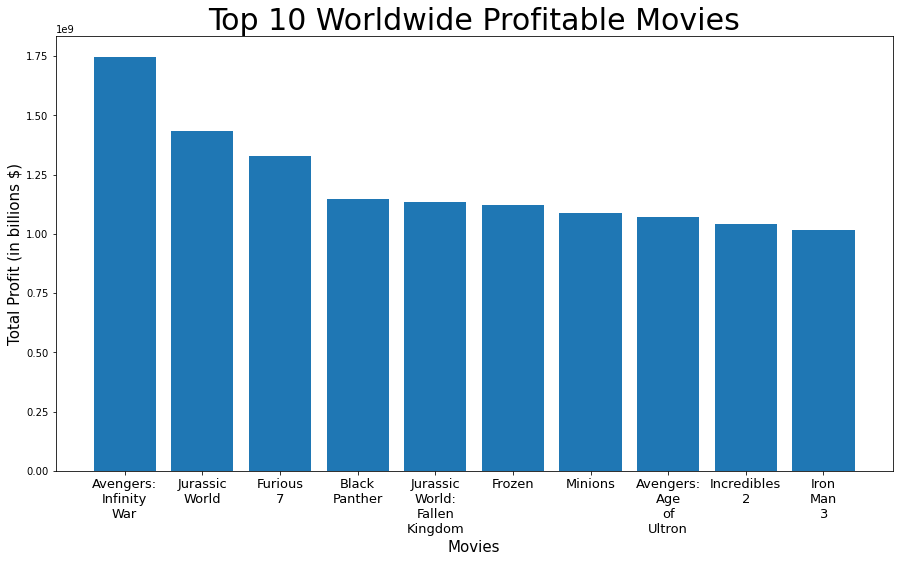

In [16]:
#Create bar chart showing Top 10 Worldwide Profitable Movies
x = movie_profits.index
y = movie_profits.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Top 10 Worldwide Profitable Movies', fontsize=30)
ax.set_xlabel('Movies', fontsize=15)
ax.set_ylabel('Total Profit (in billions $)', fontsize=15)

ax.set_xticklabels(x.str.replace(' ', '\n'))
ax.tick_params(axis='x', labelsize=13)

### The data above lets us know which movies brought in the highest profits around the globe.

# 8. Create a new column called `new_genres` and then split each genre into its own row.

We're doing this because we want to count the number of times each genre appears for our top 10 profitable movies, and we want to know which genre is the most profitable in the top 10.

To do this, you will need to use the `genres` column and split each genre from each other.

In [17]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09


In [18]:
query['new_genres'] = query['genres'].str.split(',',3)

In [19]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit,new_genres
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,"[Action, Adventure, Sci-Fi]"
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,"[Action, Adventure, Sci-Fi]"
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,"[Action, Crime, Thriller]"
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09,"[Action, Adventure, Sci-Fi]"
989,tt4881806,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,2018,170000000.0,1.305773e+09,1.135773e+09,"[Action, Adventure, Sci-Fi]"
407,tt2294629,Frozen,"Adventure,Animation,Comedy",BV,2013,150000000.0,1.272470e+09,1.122470e+09,"[Adventure, Animation, Comedy]"
646,tt2293640,Minions,"Adventure,Animation,Comedy",Uni.,2015,74000000.0,1.160336e+09,1.086336e+09,"[Adventure, Animation, Comedy]"
645,tt2395427,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,2015,330600000.0,1.403014e+09,1.072414e+09,"[Action, Adventure, Sci-Fi]"
990,tt3606756,Incredibles 2,"Action,Adventure,Animation",BV,2018,200000000.0,1.242521e+09,1.042521e+09,"[Action, Adventure, Animation]"
408,tt1300854,Iron Man 3,"Action,Adventure,Sci-Fi",BV,2013,200000000.0,1.215392e+09,1.015392e+09,"[Action, Adventure, Sci-Fi]"


Next, update the dataframe using the `explode` function so that each genre under `new_genres` is listed in its own row.

In [20]:
query = query.explode('new_genres')

In [21]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit,new_genres
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Action
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Adventure
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Sci-Fi
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Action
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Adventure
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Sci-Fi
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Action
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Crime
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Thriller
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09,Action


# 9. Group and sort in descending order all the genres associated with the Top 10 Worldwide Profitable Movies.

You will use `new_genres` column to find this.

In [22]:
query_genres = query.groupby('new_genres')['profit'].count()
query_genres

new_genres
Action       8
Adventure    9
Animation    3
Comedy       2
Crime        1
Sci-Fi       6
Thriller     1
Name: profit, dtype: int64

In [23]:
genres_sorted = query_genres.sort_values(ascending=False)
genres_sorted

new_genres
Adventure    9
Action       8
Sci-Fi       6
Animation    3
Comedy       2
Thriller     1
Crime        1
Name: profit, dtype: int64

# 10. Generate a bar plot

In the cell below, create a sorted bar chart displaying the most popular genres within the Top 10 Worldwide Profitable Movies.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Most Popular Genres From Most Profitable Movies`
3. A ylabel set to `Total Genre Count`
4. An xlabel set to `Genres`

In [24]:
genres_sorted.index

Index(['Adventure', 'Action', 'Sci-Fi', 'Animation', 'Comedy', 'Thriller',
       'Crime'],
      dtype='object', name='new_genres')

In [25]:
genres_sorted.values

array([9, 8, 6, 3, 2, 1, 1], dtype=int64)

<ipython-input-26-5a3094562b83>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(',', '\n'))


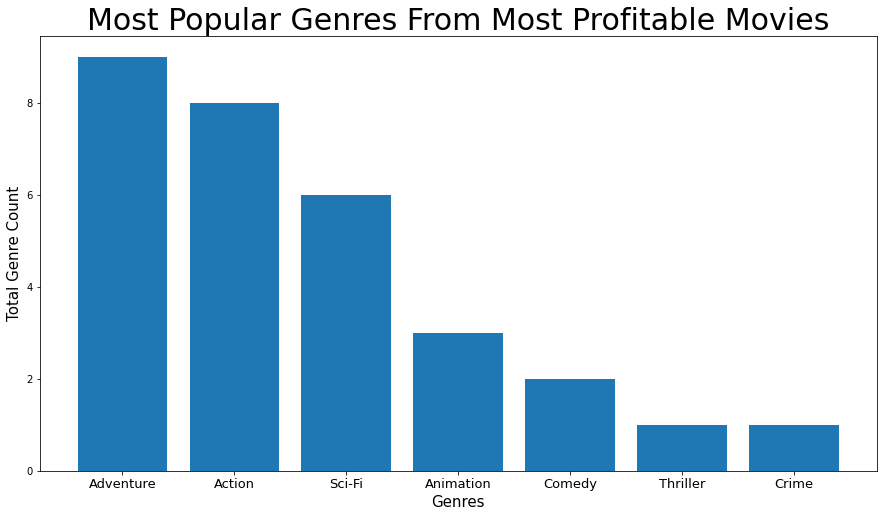

In [26]:
#Create bar chart showing the most popular genres from the top 10 most profitable movies
x = genres_sorted.index
y = genres_sorted.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Most Popular Genres From Most Profitable Movies', fontsize=30)
ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('Total Genre Count', fontsize=15)

ax.set_xticklabels(x.str.replace(',', '\n'))
ax.tick_params(axis='x', labelsize=13)

### The data above lets us know how frequent each genre appears in our Top 10 Worldwide Profitable Movies bar chart. This is important because it lets us know which genre is most popular with audiences.

# 11. Find out which genre is making the most profit from the Top 10 Most Profitable Movies.

Once again, you will use the `new_genres` column to do this.

In [27]:
query

,tconst,title,genres,studio,year,production_budget,worldwide_gross,profit,new_genres
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Action
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Adventure
987,tt4154756,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,2018,300000000.0,2.048134e+09,1.748134e+09,Sci-Fi
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Action
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Adventure
643,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,2015,215000000.0,1.648855e+09,1.433855e+09,Sci-Fi
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Action
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Crime
644,tt2820852,Furious 7,"Action,Crime,Thriller",Uni.,2015,190000000.0,1.518723e+09,1.328723e+09,Thriller
988,tt1825683,Black Panther,"Action,Adventure,Sci-Fi",BV,2018,200000000.0,1.348258e+09,1.148258e+09,Action


In [28]:
genre_profits =query.groupby('new_genres')['profit'].sum()
genre_profits

new_genres
Action       9.925070e+09
Adventure    1.080515e+10
Animation    3.251327e+09
Comedy       2.208806e+09
Crime        1.328723e+09
Sci-Fi       7.553826e+09
Thriller     1.328723e+09
Name: profit, dtype: float64

In [29]:
genre_profits_sorted = genre_profits.sort_values(ascending=False)
genre_profits_sorted

new_genres
Adventure    1.080515e+10
Action       9.925070e+09
Sci-Fi       7.553826e+09
Animation    3.251327e+09
Comedy       2.208806e+09
Thriller     1.328723e+09
Crime        1.328723e+09
Name: profit, dtype: float64

# 12. Generate a bar plot

In the cell below, create a sorted bar chart displaying the most profitable genres within the Top 10 Worldwide Profitable Movies.

Use `fig` and `ax` as your variables.

Your chart should have the following:
1. A figsize set to `(15,8)`
2. A title set to `Most Profitable Genres`
3. A ylabel set to `Profit(in billions $)`
4. An xlabel set to `Genres`

In [30]:
genre_profits_sorted.index

Index(['Adventure', 'Action', 'Sci-Fi', 'Animation', 'Comedy', 'Thriller',
       'Crime'],
      dtype='object', name='new_genres')

In [31]:
genre_profits_sorted.values

array([1.08051531e+10, 9.92506983e+09, 7.55382632e+09, 3.25132679e+09,
       2.20880608e+09, 1.32872279e+09, 1.32872279e+09])

<ipython-input-32-1368149a0d9d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x.str.replace(',', '\n'))


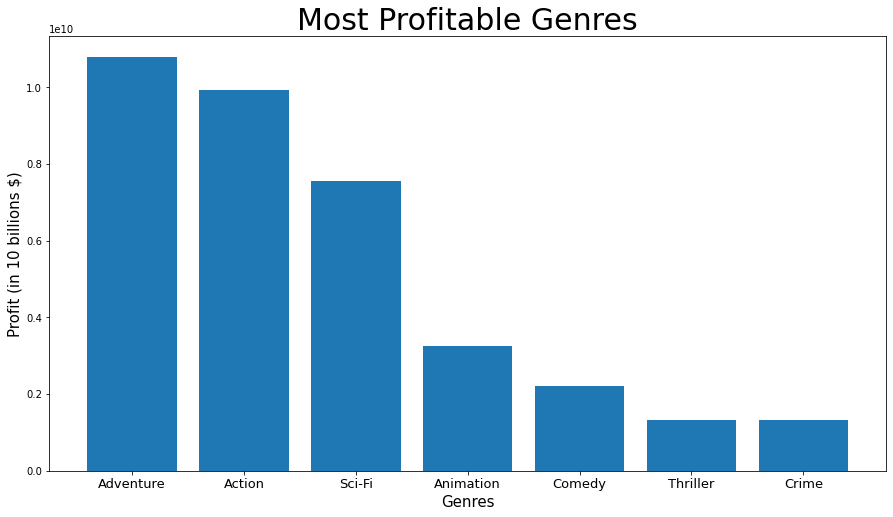

In [32]:
#Create bar chart showing the most profitable genres from the top 10 most profitable movies
x = genre_profits_sorted.index
y = genre_profits_sorted.values

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x,y)

ax.set_title('Most Profitable Genres', fontsize=30)
ax.set_xlabel('Genres', fontsize=15)
ax.set_ylabel('Profit (in 10 billions $)', fontsize=15)

ax.set_xticklabels(x.str.replace(',', '\n'))
ax.tick_params(axis='x', labelsize=13)

### The data above tells us how profitable each genre is under the Top 10 Worldwide Profitable Movies bar chart. This is important because it tells us which genres have the best chance at making a profit for movie studios.

# 13. Find the Top 10 Actors/Actresses

## Import Data

In [33]:
import sqlite3
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
tmbd = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
title_p =pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
title_b =pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
movies =pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

**Merging title principles and name basics into a single column.**

In [35]:
principals_and_names = pd.merge(
    title_p,
    name_basics,
    how='inner',
    on ='nconst')
principals_and_names.head(30)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
5,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
6,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
7,tt2712990,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
8,tt2395207,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
9,tt4566480,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


**Filter out the professions that are not actors.**

In [36]:
actors = principals_and_names[principals_and_names["primary_profession"].str.contains('actor|actress', na=False)]

In [37]:
actors.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
11,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808
12,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]",Henry Garrett,NaN,NaN,actor,"tt1441953,tt1790885,tt2639254,tt3839822"


**Filter out birth years greater than 1939**

In [38]:
actors = actors[actors['birth_year'] > 1939]
actors.sort_values(by=['birth_year'])

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
108183,tt2375005,9,nm0000448,self,NaN,"[""Himself""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
108179,tt1935072,3,nm0000448,self,NaN,"[""Himself""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
108178,tt1384961,2,nm0000448,actor,NaN,"[""Mulciber""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
108177,tt1528813,1,nm0000448,actor,NaN,"[""Mr. Darnell""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
108176,tt1558258,4,nm0000448,actor,NaN,"[""Father Reed""]",Lance Henriksen,1940.0,NaN,"actor,miscellaneous","tt0107076,tt0093605,tt0090605,tt0088247"
...,...,...,...,...,...,...,...,...,...,...,...
656421,tt4100182,2,nm6446418,actor,NaN,"[""Guyus""]",Gaius Lee DuPree,2013.0,NaN,"actor,cinematographer","tt4041788,tt3776720,tt4648810,tt4768296"
106804,tt10360096,3,nm10708650,actress,NaN,"[""Katie""]",Nayana Niter,2014.0,NaN,actress,NaN
942469,tt9396174,1,nm10306475,actress,NaN,"[""Monica""]",Natalye Archiles,2014.0,NaN,actress,"tt9392402,tt6877772,tt9396174"
942468,tt9392402,1,nm10306475,actress,NaN,"[""Buny""]",Natalye Archiles,2014.0,NaN,actress,"tt9392402,tt6877772,tt9396174"


**Merge actors and their individual ratings.**

In [39]:
actors_and_ratings = pd.merge(
    actors,
    ratings,
    how='inner',
    on ='tconst')
actors_and_ratings

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",7.8,6
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,1941.0,NaN,"actress,producer,miscellaneous","tt0315327,tt0092569,tt3216866,tt0102138",7.8,6
2,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,1941.0,NaN,"soundtrack,actor,composer","tt1478964,tt0443706,tt0118749,tt1408253",7.8,6
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",3.9,2328
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383",3.9,2328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121526,tt6798460,4,nm8214951,actress,NaN,"[""Verka""]",Elizabet Nenova,1994.0,NaN,actress,"tt6798460,tt5583498",7.9,14
121527,tt6798460,8,nm7094029,actor,NaN,"[""Commissar Yagoda""]",Soufiane El Khalidy,1987.0,NaN,"actor,writer,director","tt6302538,tt6727598,tt6294226,tt1378167",7.9,14
121528,tt7808528,1,nm1190444,self,NaN,"[""Himself""]",Dikembe Mutombo,1966.0,NaN,actor,"tt0247444,tt5134400,tt7334528,tt0182576",9.2,26
121529,tt7808528,2,nm0645927,self,NaN,"[""Himself""]",Hakeem Olajuwon,1963.0,NaN,actor,"tt0104402,tt7808528,tt7257398,tt4225230",9.2,26


**Clean the actors and ratings columns.**

In [40]:
actors_and_ratings.columns.str.replace(' ', '')
actors_and_ratings.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",7.8,6
1,tt5573596,4,nm0000476,actress,NaN,NaN,Sally Kirkland,1941.0,NaN,"actress,producer,miscellaneous","tt0315327,tt0092569,tt3216866,tt0102138",7.8,6
2,tt5573596,3,nm0121007,actor,NaN,NaN,Eric Burdon,1941.0,NaN,"soundtrack,actor,composer","tt1478964,tt0443706,tt0118749,tt1408253",7.8,6
3,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",3.9,2328
4,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,"tt0088512,tt0106097,tt0103939,tt0241383",3.9,2328


**Drop the columns that are not needed.**

In [41]:
actors_and_ratings = actors_and_ratings.drop(['ordering', 'job', 'characters', 'death_year', 'known_for_titles'], axis=1)
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt5573596,nm0398271,director,Frank Howson,1952.0,"actor,writer,producer",7.8,6
1,tt5573596,nm0000476,actress,Sally Kirkland,1941.0,"actress,producer,miscellaneous",7.8,6
2,tt5573596,nm0121007,actor,Eric Burdon,1941.0,"soundtrack,actor,composer",7.8,6
3,tt0323808,nm0574615,actor,Graham McTavish,1961.0,"actor,soundtrack,director",3.9,2328
4,tt0323808,nm0502652,actress,Jacqueline Leonard,1967.0,actress,3.9,2328
...,...,...,...,...,...,...,...,...
121526,tt6798460,nm8214951,actress,Elizabet Nenova,1994.0,actress,7.9,14
121527,tt6798460,nm7094029,actor,Soufiane El Khalidy,1987.0,"actor,writer,director",7.9,14
121528,tt7808528,nm1190444,self,Dikembe Mutombo,1966.0,actor,9.2,26
121529,tt7808528,nm0645927,self,Hakeem Olajuwon,1963.0,actor,9.2,26


**Filter out rows that are do not have "actor" or "actress" in "category" column.**

In [42]:
actors_and_ratings = actors_and_ratings[actors_and_ratings["category"].str.contains('actor|actress', na=False)]
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
1,tt5573596,nm0000476,actress,Sally Kirkland,1941.0,"actress,producer,miscellaneous",7.8,6
2,tt5573596,nm0121007,actor,Eric Burdon,1941.0,"soundtrack,actor,composer",7.8,6
3,tt0323808,nm0574615,actor,Graham McTavish,1961.0,"actor,soundtrack,director",3.9,2328
4,tt0323808,nm0502652,actress,Jacqueline Leonard,1967.0,actress,3.9,2328
5,tt1680140,nm0574615,actor,Graham McTavish,1961.0,"actor,soundtrack,director",5.1,777
...,...,...,...,...,...,...,...,...
121523,tt7935646,nm7487478,actress,Zeynep Tugçe Bayat,1990.0,"actress,soundtrack",5.0,473
121524,tt8178850,nm0596670,actress,Claudia Molina,1985.0,"actress,soundtrack",3.5,30
121526,tt6798460,nm8214951,actress,Elizabet Nenova,1994.0,actress,7.9,14
121527,tt6798460,nm7094029,actor,Soufiane El Khalidy,1987.0,"actor,writer,director",7.9,14


1. Making a new variable that stores average rating mutiplied by their votes.
2. Sort values by ascending.

In [43]:
actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']
actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

<ipython-input-43-b3585c45e334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']


,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes,popularity_&_rating
52206,tt1375666,nm0330687,actor,Joseph Gordon-Levitt,1981.0,"actor,producer,soundtrack",8.8,1841066,16201380.8
52203,tt1375666,nm0913822,actor,Ken Watanabe,1959.0,"actor,producer,director",8.8,1841066,16201380.8
52204,tt1375666,nm0000138,actor,Leonardo DiCaprio,1974.0,"actor,producer,writer",8.8,1841066,16201380.8
52205,tt1375666,nm0680983,actress,Ellen Page,1987.0,"actress,producer,soundtrack",8.8,1841066,16201380.8
4677,tt1345836,nm0000198,actor,Gary Oldman,1958.0,"actor,soundtrack,producer",8.4,1387769,11657259.6
...,...,...,...,...,...,...,...,...,...
110611,tt8446392,nm0129648,actress,Nathalie Caldonazzo,1969.0,actress,1.0,5,5.0
112502,tt6792126,nm2511348,actress,Anna Kulovaná,1981.0,actress,1.0,5,5.0
112499,tt6792126,nm0603184,actress,Dana Morávková,1971.0,"actress,soundtrack,miscellaneous",1.0,5,5.0
112501,tt6792126,nm1551077,actor,Ladislav Ondrej,1991.0,actor,1.0,5,5.0


**Drop columns that are not needed.**

In [44]:
simple_actors_and_ratings = actors_and_ratings.drop(['tconst','nconst','category','birth_year','primary_profession','averagerating','numvotes'], axis=1)
simple_actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

,primary_name,popularity_&_rating
52206,Joseph Gordon-Levitt,16201380.8
52203,Ken Watanabe,16201380.8
52204,Leonardo DiCaprio,16201380.8
52205,Ellen Page,16201380.8
4677,Gary Oldman,11657259.6
...,...,...
110611,Nathalie Caldonazzo,5.0
112502,Anna Kulovaná,5.0
112499,Dana Morávková,5.0
112501,Ladislav Ondrej,5.0


1. Group primary name,mean, and count.
2. Find the mean of the popularity and reviews. 

In [45]:
actors_ranking = simple_actors_and_ratings.groupby(by=['primary_name']).agg(['mean','count'],as_index=False)
actors_ranking = actors_ranking.rename(columns={'mean':'pop_and_reviews','count':'count'})
actors_ranking.columns = actors_ranking.columns.droplevel(0)
actors_ranking = actors_ranking.sort_values(by=['pop_and_reviews'],ascending=False)
actors_ranking

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5.199703e+06,10
Idina Menzel,3.877485e+06,1
Robert Downey Jr.,3.751984e+06,13
Lucy Davis,3.656452e+06,1
Carrie Fisher,3.286611e+06,1
...,...,...
Yûichirô Hirose,6.000000e+00,1
Ladislav Ondrej,5.000000e+00,1
Anna Kulovaná,5.000000e+00,1


In [46]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**List out the top 10**

In [47]:
top_10 = actors_ranking.head(10)
top_10

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5199703.07,10
Idina Menzel,3877485.00,1
Robert Downey Jr.,3751983.99,13
Lucy Davis,3656452.50,1
Carrie Fisher,3286611.30,1
Daniel Kaluuya,3083649.80,1
Tom Hardy,2985223.97,13
Donna Murphy,2857654.80,1
Ben Hardy,2763728.00,1


## Plot Data

<function matplotlib.pyplot.show(close=None, block=None)>

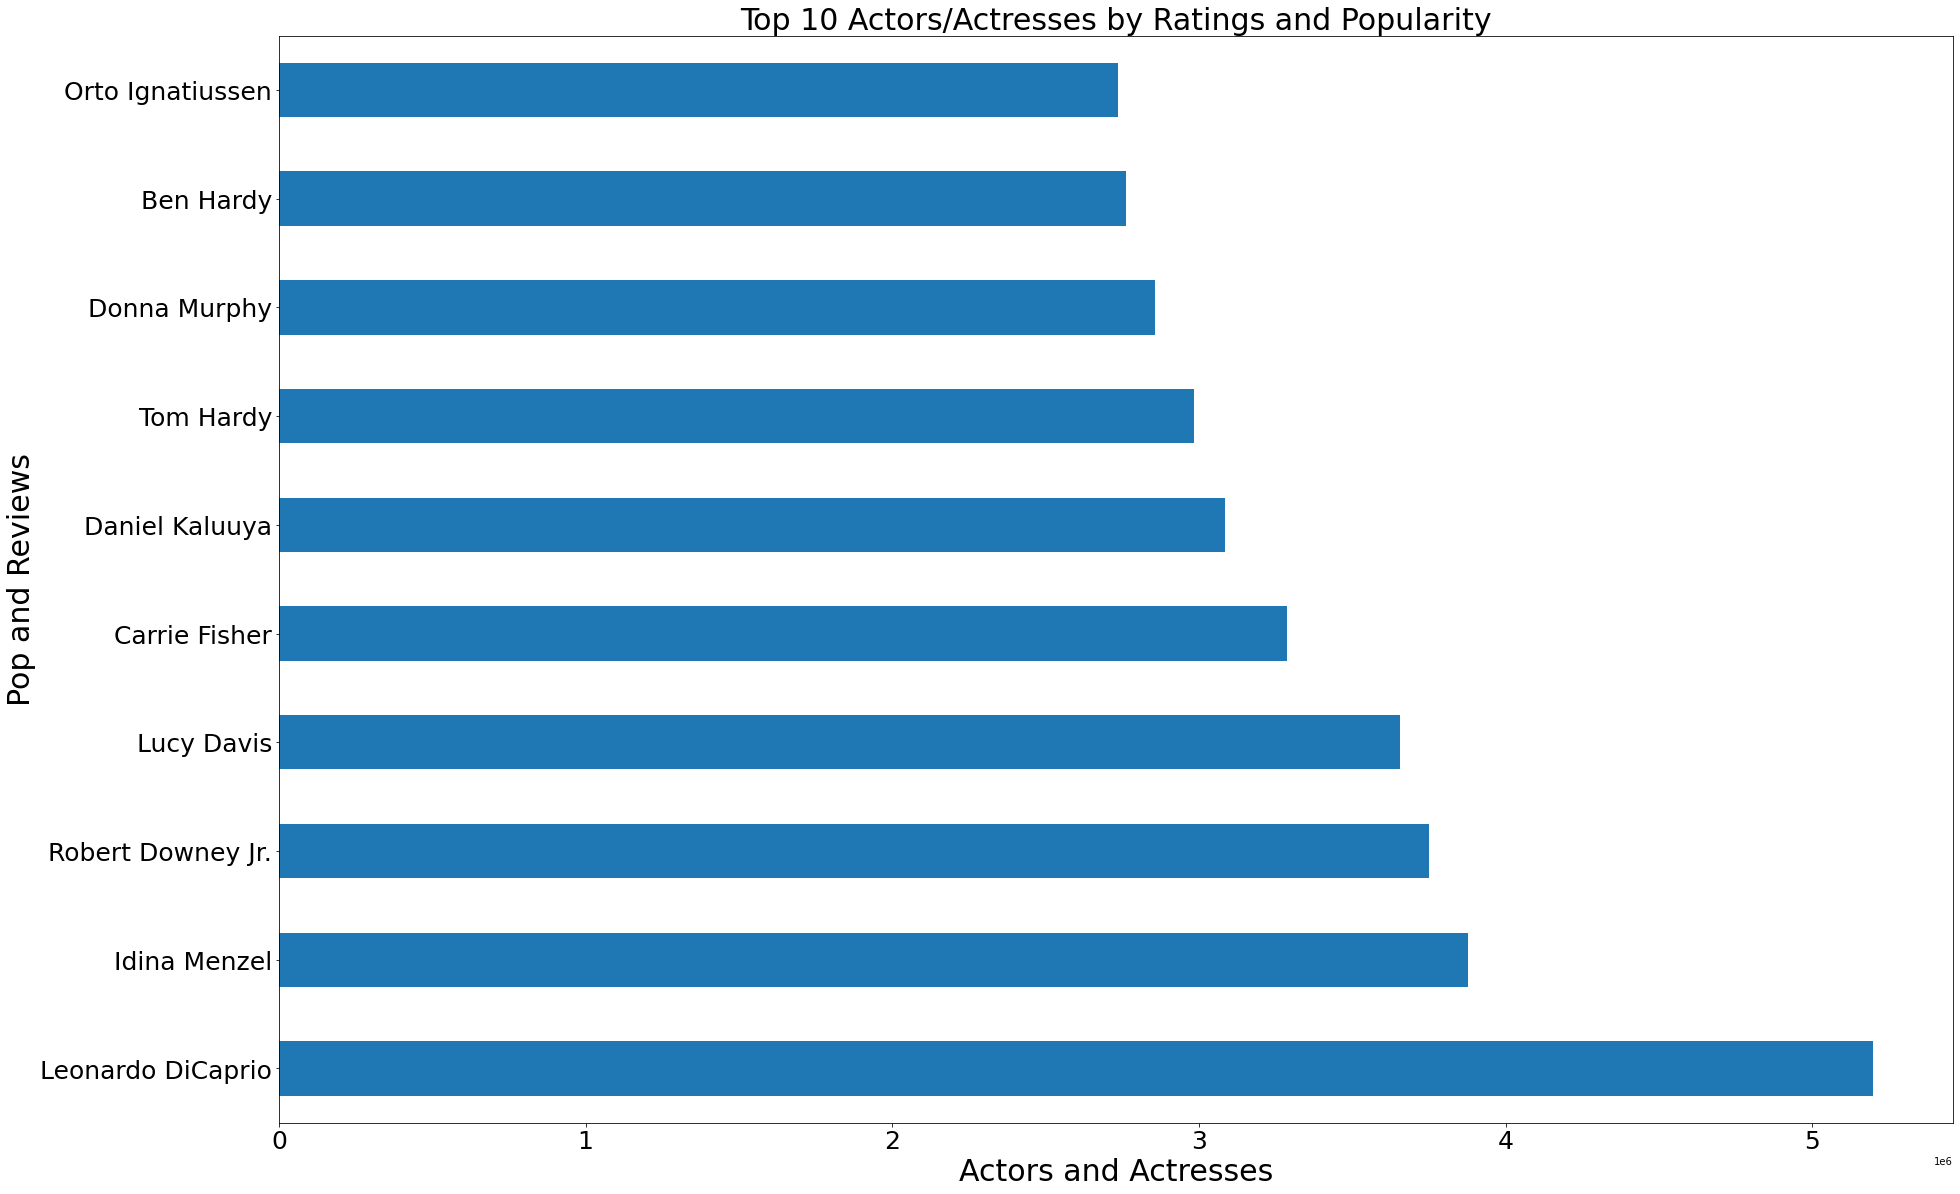

In [48]:
from matplotlib import pyplot as plt
top_10['pop_and_reviews'].plot(kind="barh",figsize=(30, 20),fontsize=25)
plt.title("Top 10 Actors/Actresses by Ratings and Popularity",fontsize=30)
plt.ylabel("Pop and Reviews",fontsize=30)
plt.xlabel("Actors and Actresses",fontsize=30)

plt.show

In [49]:
#import data then merge to dataframes 
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
tmbd = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
princi_title=pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
title_b =pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
movies =pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

In [50]:
names_descript = pd.merge(
    princi_title,
    name_basics,
    how='inner',
    on ='nconst')
names_descript.head(30)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,nan,nan,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.00,nan,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt5573596,5,nm0398271,director,NaN,NaN,Frank Howson,1952.00,nan,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
3,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,nan,nan,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
5,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
6,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
7,tt2712990,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
8,tt2395207,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
9,tt4566480,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


In [51]:
directors = names_descript[names_descript["primary_profession"].str.contains('director|director', na=False)]

In [52]:
directors.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
4,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
5,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
6,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
7,tt2712990,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
8,tt2395207,9,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"


In [53]:
directors = directors[directors['birth_year'] > 1939]
directors.sort_values(by=['birth_year'])

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
47365,tt1706417,2,nm0000783,self,NaN,"[""Himself""]",Dario Argento,1940.00,nan,"writer,director,producer","tt0065143,tt0093677,tt0073582,tt0087909"
5208,tt3315342,2,nm0001772,actor,NaN,"[""Charles""]",Patrick Stewart,1940.00,nan,"actor,producer,director","tt0120903,tt0117731,tt3315342,tt0120844"
5209,tt6108612,1,nm0001772,actor,NaN,"[""Narrator""]",Patrick Stewart,1940.00,nan,"actor,producer,director","tt0120903,tt0117731,tt3315342,tt0120844"
5210,tt5066056,3,nm0001772,actor,NaN,"[""Harold""]",Patrick Stewart,1940.00,nan,"actor,producer,director","tt0120903,tt0117731,tt3315342,tt0120844"
5211,tt5610626,1,nm0001772,actor,NaN,"[""Drago""]",Patrick Stewart,1940.00,nan,"actor,producer,director","tt0120903,tt0117731,tt3315342,tt0120844"
...,...,...,...,...,...,...,...,...,...,...,...
750831,tt5709892,5,nm8395992,producer,producer,NaN,Andrey Gromov,2004.00,nan,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
750833,tt6017238,3,nm8395992,actor,NaN,"[""Alexandr Zlovredniy""]",Andrey Gromov,2004.00,nan,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
750834,tt4980576,3,nm8395992,actor,NaN,"[""Andrey""]",Andrey Gromov,2004.00,nan,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"
750832,tt6018006,2,nm8395992,actor,NaN,"[""Andrey""]",Andrey Gromov,2004.00,nan,"producer,actor,director","tt4980576,tt6017238,tt6207700,tt6018006"


In [54]:
names_descript = pd.merge(
    directors,
    ratings,
    how='inner',
    on ='tconst')
names_descript

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",3.90,2328
1,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.00,nan,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",3.90,2328
2,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",4.10,48
3,tt2081348,2,nm0803397,actor,NaN,"[""Paul""]",Jamie Sives,1973.00,nan,"actor,producer,director","tt0862467,tt0329767,tt0291341,tt1226229",4.10,48
4,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",6.50,3460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52154,tt8037610,10,nm0787509,actress,NaN,NaN,Renuka Shahane,1966.00,nan,"actress,writer,director","tt0306971,tt1503723,tt0110076,tt5581434",8.30,247
52155,tt6798460,8,nm7094029,actor,NaN,"[""Commissar Yagoda""]",Soufiane El Khalidy,1987.00,nan,"actor,writer,director","tt6302538,tt6727598,tt6294226,tt1378167",7.90,14
52156,tt8328740,5,nm0466901,director,NaN,NaN,Kitarô Kôsaka,1962.00,nan,"art_department,animation_department,director","tt0092067,tt0382868,tt0094625,tt2013293",6.90,251
52157,tt8861786,3,nm1035160,actor,NaN,"[""Dog Gnarly""]",Tyreese Burnett,1975.00,nan,"actor,producer,art_director","tt0208614,tt1362426,tt0804502,tt0303933",4.40,88


In [55]:
names_descript.columns.str.replace(', ', '')
names_descript.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",3.90,2328
1,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.00,nan,"actor,soundtrack,director","tt0462499,tt0903624,tt1477834,tt1170358",3.90,2328
2,tt2081348,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",4.10,48
3,tt2081348,2,nm0803397,actor,NaN,"[""Paul""]",Jamie Sives,1973.00,nan,"actor,producer,director","tt0862467,tt0329767,tt0291341,tt1226229",4.10,48
4,tt1414378,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.00,nan,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",6.50,3460


In [56]:
names_descript= names_descript.drop(['ordering', 'job', 'characters', 'death_year', 'known_for_titles'], axis=1)
names_descript

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt0323808,nm0059247,editor,Sean Barton,1944.00,"editor,editorial_department,assistant_director",3.90,2328
1,tt0323808,nm0574615,actor,Graham McTavish,1961.00,"actor,soundtrack,director",3.90,2328
2,tt2081348,nm0059247,editor,Sean Barton,1944.00,"editor,editorial_department,assistant_director",4.10,48
3,tt2081348,nm0803397,actor,Jamie Sives,1973.00,"actor,producer,director",4.10,48
4,tt1414378,nm0059247,editor,Sean Barton,1944.00,"editor,editorial_department,assistant_director",6.50,3460
...,...,...,...,...,...,...,...,...
52154,tt8037610,nm0787509,actress,Renuka Shahane,1966.00,"actress,writer,director",8.30,247
52155,tt6798460,nm7094029,actor,Soufiane El Khalidy,1987.00,"actor,writer,director",7.90,14
52156,tt8328740,nm0466901,director,Kitarô Kôsaka,1962.00,"art_department,animation_department,director",6.90,251
52157,tt8861786,nm1035160,actor,Tyreese Burnett,1975.00,"actor,producer,art_director",4.40,88


In [57]:
names_descript = names_descript[names_descript["category"].str.contains('director|director', na=False)]
names_descript

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
5,tt1414378,nm0789054,director,Ian Sharp,1946.00,"director,assistant_director,writer",6.50,3460
11,tt1680140,nm0425894,director,Niall Johnson,1965.00,"writer,director,producer",5.10,777
15,tt0417610,nm1145057,director,Alejandro Chomski,1968.00,"director,writer,producer",6.40,80
17,tt1563675,nm0563760,director,Laura Mañá,1968.00,"actress,director,writer",6.20,17
20,tt0426566,nm1163513,director,Julio Bove,1954.00,"producer,director,actor",6.00,13
...,...,...,...,...,...,...,...,...
52147,tt9260454,nm1887409,director,Dani Rosenberg,1979.00,"writer,director,producer",8.60,11
52150,tt7001792,nm0088392,director,Michael Blieden,1971.00,"writer,director,actor",6.00,8
52153,tt7836394,nm9535026,director,Nico Baumbach,1986.00,"director,cinematographer,editor",8.10,8
52156,tt8328740,nm0466901,director,Kitarô Kôsaka,1962.00,"art_department,animation_department,director",6.90,251


In [58]:
names_descript['Popularity_Ratings'] = names_descript['averagerating'] * names_descript['numvotes']
names_descript.sort_values(by=['Popularity_Ratings'],ascending=False)

<ipython-input-58-52fb35f770a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  names_descript['Popularity_Ratings'] = names_descript['averagerating'] * names_descript['numvotes']


,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes,Popularity_Ratings
15350,tt1375666,nm0634240,director,Christopher Nolan,1970.00,"writer,producer,director",8.80,1841066,16201380.80
30654,tt1345836,nm0634240,director,Christopher Nolan,1970.00,"writer,producer,director",8.40,1387769,11657259.60
30659,tt0816692,nm0634240,director,Christopher Nolan,1970.00,"writer,producer,director",8.60,1299334,11174272.40
2401,tt0848228,nm0923736,director,Joss Whedon,1964.00,"writer,producer,director",8.10,1183655,9587605.50
11986,tt0993846,nm0000217,director,Martin Scorsese,1942.00,"producer,director,actor",8.20,1035358,8489935.60
...,...,...,...,...,...,...,...,...,...
44039,tt5364390,nm0158427,director,Derek Chiu,1961.00,"director,writer,producer",2.00,5,10.00
12417,tt5935758,nm3062127,director,Geno McGahee,1974.00,"writer,producer,director",2.00,5,10.00
45700,tt8476266,nm2508880,director,Ján Novák,1966.00,"director,writer,editor",1.50,6,9.00
46010,tt6153116,nm1512437,director,Maria Ramos,1964.00,"director,writer,producer",1.00,7,7.00


In [59]:
director_ratings = names_descript.drop(['tconst','nconst','category','birth_year','primary_profession','averagerating','numvotes',], axis=1)
director_ratings.sort_values(by=['Popularity_Ratings'],ascending=False)

,primary_name,Popularity_Ratings
15350,Christopher Nolan,16201380.80
30654,Christopher Nolan,11657259.60
30659,Christopher Nolan,11174272.40
2401,Joss Whedon,9587605.50
11986,Martin Scorsese,8489935.60
...,...,...
44039,Derek Chiu,10.00
12417,Geno McGahee,10.00
45700,Ján Novák,9.00
46010,Maria Ramos,7.00


In [60]:
directors_rank = director_ratings.groupby(by=['primary_name']).agg(['mean','count'],as_index=False)
directors_rank = directors_rank.rename(columns={'mean':'Popularity_Ratings','count':'count'})
directors_rank.columns = directors_rank.columns.droplevel(0)
directors_rank = directors_rank.sort_values(by=['Popularity_Ratings'],ascending=False)
directors_rank

,Popularity_Ratings,count
primary_name,,
Christopher Nolan,10679723.70,4
Joss Whedon,4852476.57,3
Anthony Russo,4833244.80,4
Joe Russo,4833244.80,4
David Fincher,4523356.60,3
...,...,...
Daisuke Yamanouchi,16.60,4
Henrik Normann,16.00,1
Ping Ho,13.20,1


In [61]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [62]:
top_10_dir = directors_rank.head(10)
top_10_dir

,Popularity_Ratings,count
primary_name,,
Christopher Nolan,10679723.70,4
Joss Whedon,4852476.57,3
Anthony Russo,4833244.80,4
Joe Russo,4833244.80,4
David Fincher,4523356.60,3
James Gunn,3960186.50,3
Chris Buck,3877485.00,1
Patty Jenkins,3656452.50,1
Matthew Vaughn,3557716.60,4


<function matplotlib.pyplot.show(close=None, block=None)>

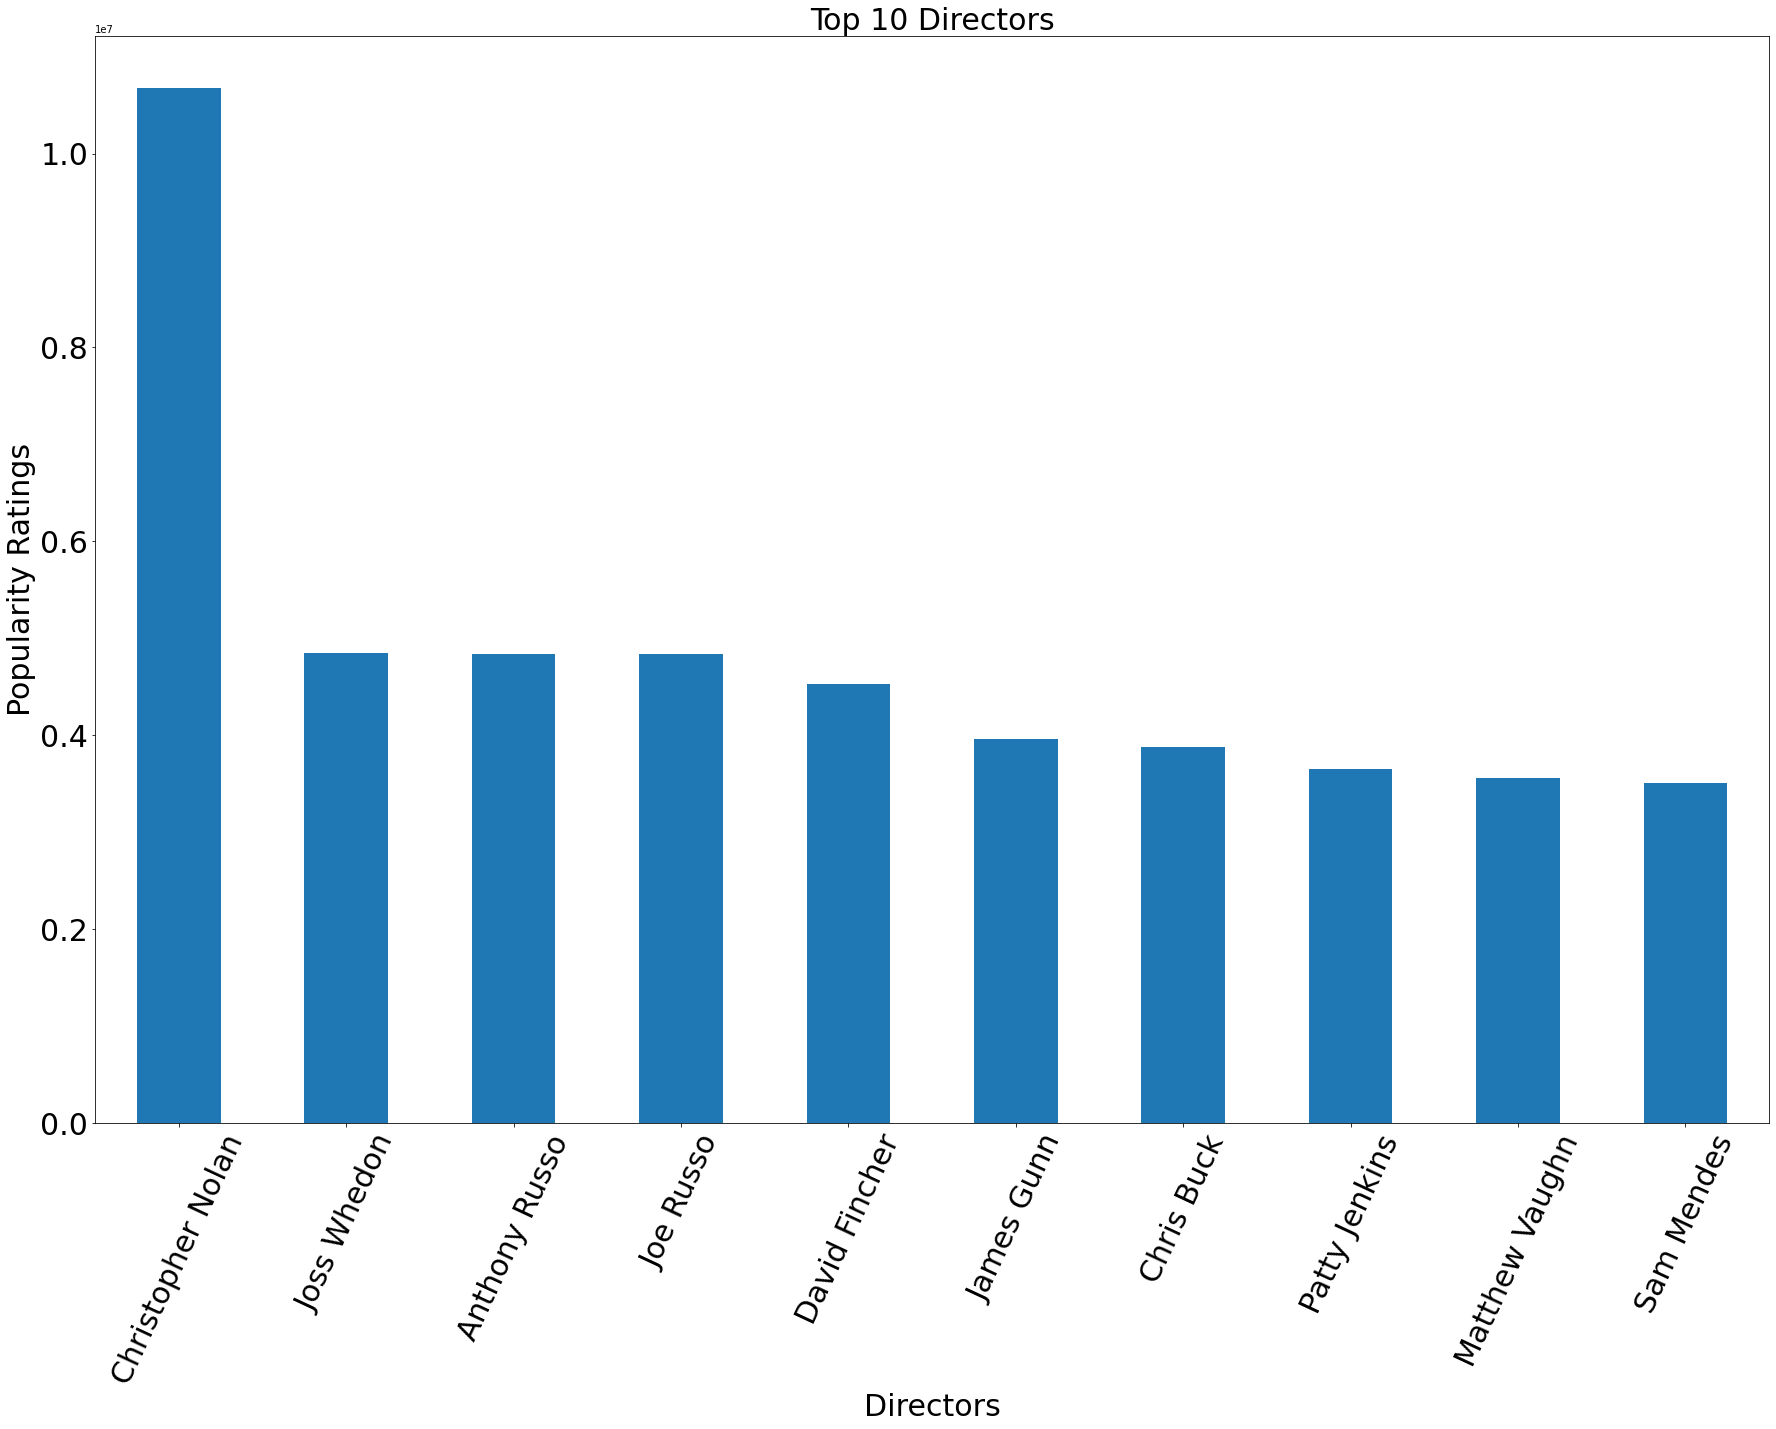

In [63]:
from matplotlib import pyplot as plt
top_10_dir['Popularity_Ratings'].plot(kind="bar",figsize=(30, 20),fontsize=30)

plt.title("Top 10 Directors",fontsize=30)
plt.ylabel("Popularity Ratings",fontsize=30)
plt.xlabel("Directors",fontsize=30)
plt.xticks(rotation = 65)
plt.show